Please wait
Iteration is finished


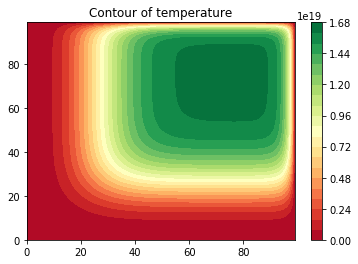

In [20]:
import numpy as np
import matplotlib.pyplot as plt

maxIter = 100

lenX = lenY = 100
delta = 1

Ttop = 0
Tbottom = 50
Tleft = 0
Tright = 0
Ttoper = 0
Tbottomer = 50
Tlefter = 0
Trighter = 0

Tguess = 40

colorinterpolation = 20
colourMap = plt.cm.jet

X, Y = np.meshgrid(np.arange(0,lenX), np.arange(0,lenY))

T = np.empty((lenX,lenY))
T.fill(Tguess)

T[(lenY-1):, :] = Ttop
T[:1, :] = Tbottom
T[:, (lenX-1):] = Tright
T[:, :1] = Tleft
T[(lenY-1):, :] = Ttoper
T[:1, :] = Tbottomer
T[:, (lenX-1):] = Trighter
T[:, :1] = Tlefter

print("Please wait")

for iteration in range(0,maxIter):
    for i in range(1, lenX-1,delta):
        for j in range(1, lenY-1,delta):
            T[i, j] = 0.15 * (T[i+1][j] + T[i-1][j] + T[i][j+1] + T[i][j-1] + T[i+1][j] + T[i-1][j] + T[i][j+1] + T[i][j-1])

print("Iteration is finished")

plt.title("Contour of temperature")
plt.contourf(X, Y, T, colorinterpolation, cmap='RdYlGn')


plt.colorbar()

{'left': False, 'right': False, 'top': False, 'bottom': False, 'labelleft': False, 'labelright': False, 'labeltop': False, 'labelbottom': False}


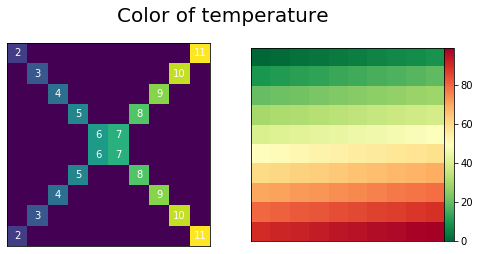

In [40]:
x = np.diag(np.arange(2, 12))[::-1]
x[np.diag_indices_from(x[::-1])] = np.arange(2, 12)
x2 = np.arange(x.size).reshape(x.shape)


sides = ('left', 'right', 'top', 'bottom')
nolabels = {s: False for s in sides}
nolabels.update({'label%s' % s: False for s in sides})
print(nolabels)
{'left': False, 'right': False, 'top': False, 'bottom': False, 'labelleft': False,
 'labelright': False, 'labeltop': False, 'labelbottom': False}


from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

with plt.rc_context(rc={'axes.grid': False}):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
    ax1.matshow(x)
    img2 = ax2.matshow(x2, cmap='RdYlGn_r')
    for ax in (ax1, ax2):
        ax.tick_params(axis='both', which='both', **nolabels)
    for i, j in zip(*x.nonzero()):
        ax1.text(j, i, x[i, j], color='white', ha='center', va='center')

    divider = make_axes_locatable(ax2)
    cax = divider.append_axes("right", size='5%', pad=0)
    plt.colorbar(img2, cax=cax, ax=[ax1, ax2])
    fig.suptitle('Color of temperature', fontsize=20)

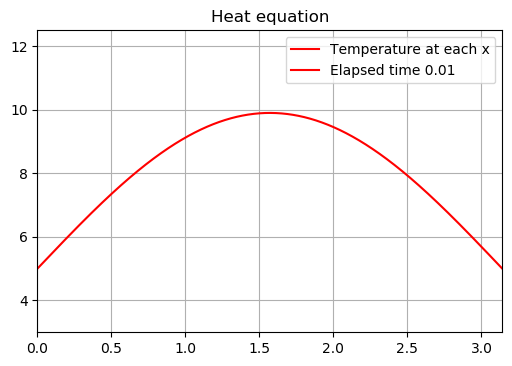

In [38]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()
fig.set_dpi(100)
ax1 = fig.add_subplot(1,1,1)

#Diffusion constant
k = 2

#Scaling factor (for visualisation purposes)
scale = 5

#Length of the rod (0,L) on the x axis
L = pi

#Initial contitions u(0,t) = u(L,t) = 0. Temperature at x=0 and x=L is fixed
x0 = np.linspace(0,L+1,10000)
t0 = 0
temp0 = 5  #Temperature of the rod at rest (before heating)

#Increment
dt = 0.01

#Heat function
def u(x,t):
    return temp0 + scale*np.exp(-k*t)*np.sin(x)

#Gradient of u
def grad_u(x,t):
                               #du/dx              #du/dt
    return scale*np.array([np.exp(-k*t)*np.cos(x),-k*np.exp(-k*t)*np.sin(x)])

a = []
t = []

for i in range(500):
    value = u(x0,t0) + grad_u(x0,t0)[1]*dt
    t.append(t0)
    t0 = t0 + dt
    a.append(value)

k = 0
def animate(i):         #The plot shows the temperature evolving with time
    global k            #at each point x in the rod
    x = a[k]            #The ends of the rod are kept at temperature temp0
    k += 1              #The rod is heated in one spot, then it cools down
    ax1.clear()
    plt.plot(x0,x,color='red',label='Temperature at each x')
    plt.plot(0,0,color='red',label='Elapsed time '+str(round(t[k],2)))
    plt.grid(True)
    plt.ylim([temp0-2,2.5*scale])
    plt.xlim([0,L])
    plt.title('Heat equation')
    plt.legend()
    
anim = animation.FuncAnimation(fig,animate,frames=360,interval=20)
plt.show()

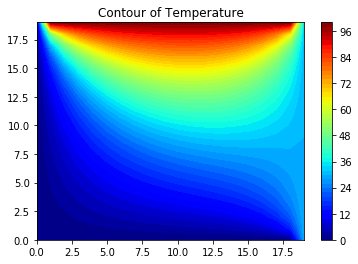

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Set maximum iteration
maxIter = 500

# Set Dimension and delta
lenX = lenY = 20 #we set it rectangular
delta = 1

# Boundary condition
Ttop = 100
Tbottom = 0
Tleft = 0
Tright = 30

# Initial guess of interior grid
Tguess = 30

# Set colour interpolation and colour map
colorinterpolation = 50
colourMap = plt.cm.jet #you can try: colourMap = plt.cm.coolwarm

# Set meshgrid
X, Y = np.meshgrid(np.arange(0, lenX), np.arange(0, lenY))

# Set array size and set the interior value with Tguess
T = np.empty((lenX, lenY))
T.fill(Tguess)

# Set Boundary condition
T[(lenY-1):, :] = Ttop
T[:1, :] = Tbottom
T[:, (lenX-1):] = Tright
T[:, :1] = Tleft

# Iteration (We assume that the iteration is convergence in maxIter = 500)

for iteration in range(0, maxIter):
    for i in range(1, lenX-1, delta):
        for j in range(1, lenY-1, delta):
            T[i, j] = 0.25 * (T[i+1][j] + T[i-1][j] + T[i][j+1] + T[i][j-1])



# Configure the contour
plt.title("Contour of Temperature")
plt.contourf(X, Y, T, colorinterpolation, cmap=colourMap)

# Set Colorbar
plt.colorbar()

# Show the result in the plot window
plt.show()

print("")